In [ ]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Fase 1: Análisis del Dataset

In [ ]:
df = pd.read_csv('Sample-Superstore.csv', encoding='latin1', index_col=0)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# Estructura del dataset
df.shape

(9994, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount     

In [ ]:
# Verificamos valores nulos
print(df.isnull().sum())

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [ ]:
# Verificamos valores duplicados
df.duplicated().sum()

# Eliminamos el duplicado
df.drop_duplicates(inplace=True)

In [ ]:
# Revisamos nuevamente la estructura del dataset
df.shape

(9993, 20)

In [ ]:
# Generamos una descripción estadística de las variables del dataset
df.describe(include='all')

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9993,9993,9993,9993,9993,9993,9993,9993,9993,9993,9993.000000,9993,9993,9993,9993,9993,9993.000000,9993.000000,9993.000000,9993.000000
unique,5009,1237,1334,4,793,793,3,1,531,49,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,14,38,35,5967,37,37,5191,9993,915,2001,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55191.576403,NaN,NaN,NaN,NaN,NaN,229.852846,3.789753,0.156188,28.660971
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32065.074478,NaN,NaN,NaN,NaN,NaN,623.276074,2.225149,0.206457,234.271476
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.731000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56560.000000,NaN,NaN,NaN,NaN,NaN,54.480000,3.000000,0.200000,8.671000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


Los resultados del análisis nos proporcionan información valiosa, como los valores más comunes en variables categóricas (como nombres), y valores mínimos, máximos y promedios en variables numéricas (como cantidades).

Sin embargo, se aprecia que hay una variables que se está considerando erróneamente, que es el código postal, por lo que debemos transformarla.

In [ ]:
# Transformaremos la columna "Postal Code" de numérica a categórica
df['Postal Code'] = df['Postal Code'].astype(str)

In [ ]:
# Vemos nuevamente la descripción estadística del dataset, y ahora se solucionó ello
df.describe(include='all')

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9993,9993,9993,9993,9993,9993,9993,9993,9993,9993,9993,9993,9993,9993,9993,9993,9993.000000,9993.000000,9993.000000,9993.000000
unique,5009,1237,1334,4,793,793,3,1,531,49,631,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,10035,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,14,38,35,5967,37,37,5191,9993,915,2001,263,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229.852846,3.789753,0.156188,28.660971
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,623.276074,2.225149,0.206457,234.271476
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.731000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.480000,3.000000,0.200000,8.671000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


### Análisis EDA

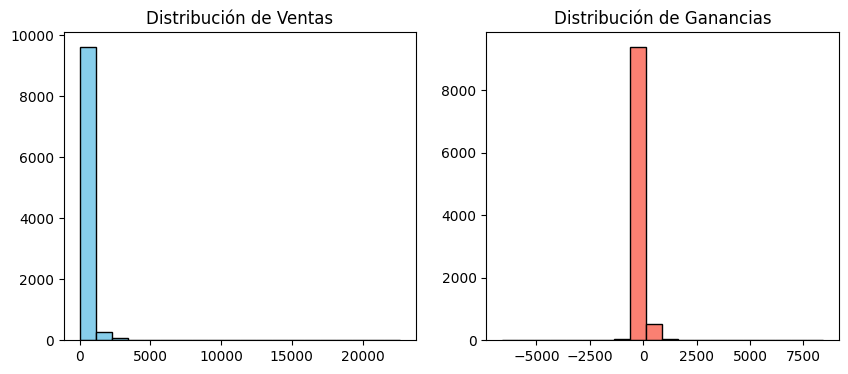

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(df['Sales'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Ventas')

plt.subplot(1,2,2)
plt.hist(df['Profit'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribución de Ganancias')

plt.show()

Se puede apreciar que, en cuanto a los datos de ventas y ganancias, existe una tendencia general hacia la compra de cantidades de ciertos productos en órdenes en menos de 5000 unidades. Asimismo, se evidencia que las ganancias obtenidas de estas ventas se concentran en valores bajos en la gráfica, incluso varios por debajo de 0, lo que haría suponer que en varios casos algunos productos se están vendiendo a pérdida, con escasos casos de beneficio.

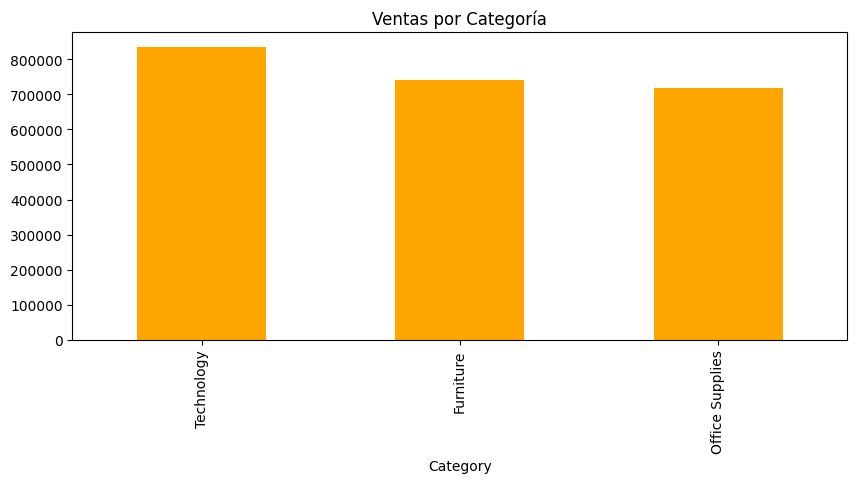

In [ ]:
# Ahora, analizaremos la cantidad de ventas por cada tipo de producto
plt.figure(figsize=(10,4))
df.groupby('Category')['Sales'].sum().sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Ventas por Categoría')
plt.show()

Se puede apreciar que las 3 categorías de productos en el dataset poseen altos números de ventas totales, alrededor de 700,000 ventas, y en uno llegando a más de 800,000. Si comparamos estos resultados con los de la descripción estadística del dataset, se visualiza que "Office Supplies" ha sido la categoría de productos que más ha aparecido en base a la diversidad de productos detectados en las órdenes, pero aún así ha sido el de menor ventas entre los 3.

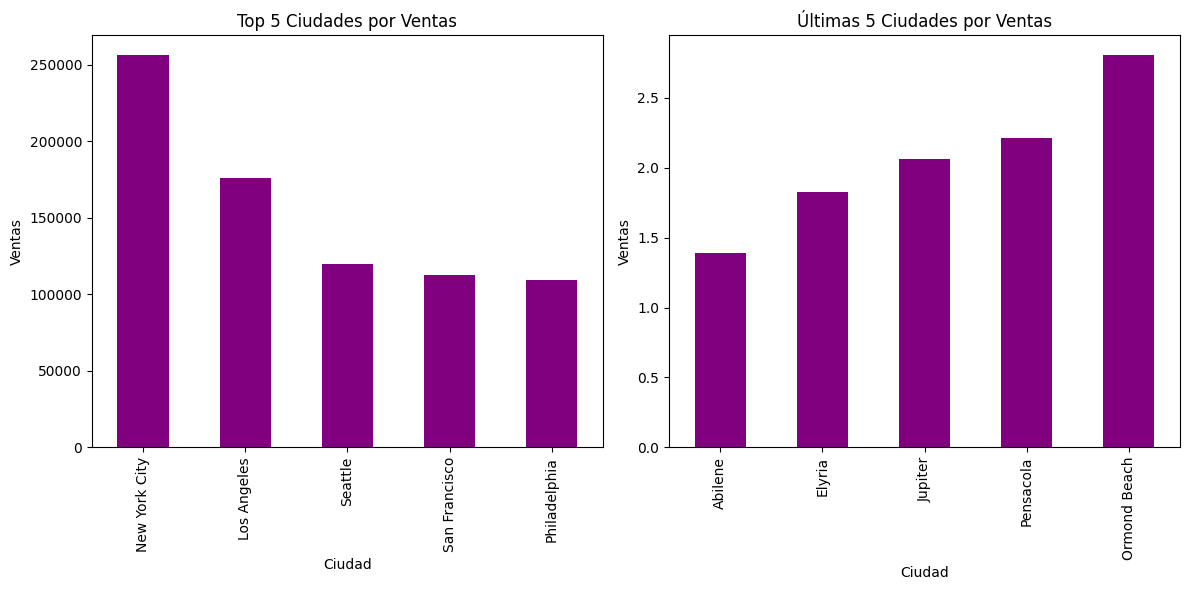

In [ ]:
# Ahora, analizaremos la cantidad de ventas por ciudad
plt.figure(figsize=(12, 6))

# Top 5 ciudades por ventas
top_5_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(5)
plt.subplot(1, 2, 1)
top_5_cities.plot(kind='bar', color='purple')
plt.title('Top 5 Ciudades por Ventas')
plt.ylabel('Ventas')
plt.xlabel('Ciudad')

# Últimas 5 ciudades por ventas
bottom_5_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=True).head(5)
plt.subplot(1, 2, 2)
bottom_5_cities.plot(kind='bar', color='purple')
plt.title('Últimas 5 Ciudades por Ventas')
plt.ylabel('Ventas')
plt.xlabel('Ciudad')

plt.tight_layout()
plt.show()

De estos gráficos, podemos visualizar que la mayor cantidad de ventas se ha hecho en New York City, mientras que la de menor cantidad fue Abilene.

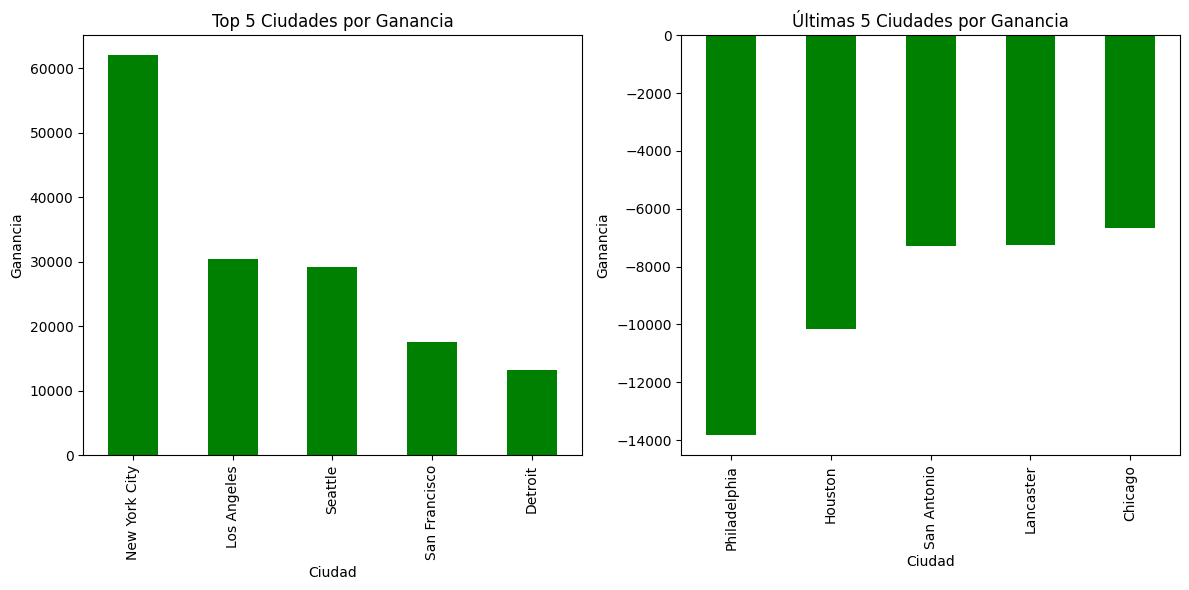

In [ ]:
# Visualizaremos ahora las ganancias por cada ciudad
plt.figure(figsize=(12, 6))

# Top 5 ciudades por ventas
top_5_cities = df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(5)
plt.subplot(1, 2, 1)
top_5_cities.plot(kind='bar', color='green')
plt.title('Top 5 Ciudades por Ganancia')
plt.ylabel('Ganancia')
plt.xlabel('Ciudad')

# Últimas 5 ciudades por ventas
bottom_5_cities = df.groupby('City')['Profit'].sum().sort_values(ascending=True).head(5)
plt.subplot(1, 2, 2)
bottom_5_cities.plot(kind='bar', color='green')
plt.title('Últimas 5 Ciudades por Ganancia')
plt.ylabel('Ganancia')
plt.xlabel('Ciudad')

plt.tight_layout()
plt.show()

Al analizar la ganancia por cada ciudad, se puede ver que en este caso New York City es tanto la ciudad con mayores ventas y a la vez con mayores ganancias. Por el otro lado, ninguna de las ciudades de pocas ventas aparece en las de menor ganancia (lo que puede deberse a su poca cantidad de ventas, y a un profit de cada uno más equilibrado), y aparecen otras ciudades. La de menor ganancia (que es negativo, con casi -14000 unidades de pérdida) es Philadelphia, lo cual es un resultado interesante, ya que esta es la 5ta ciudad con mayores ventas.

             Sales    Profit  Discount  Quantity
Sales     1.000000  0.479067 -0.028197  0.200808
Profit    0.479067  1.000000 -0.219481  0.066241
Discount -0.028197 -0.219481  1.000000  0.008680
Quantity  0.200808  0.066241  0.008680  1.000000


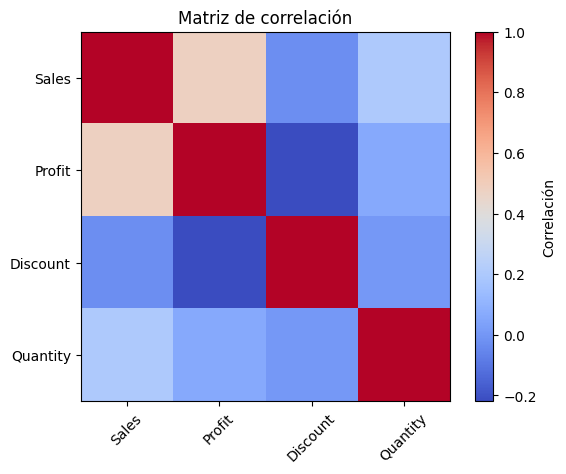

In [ ]:
# Usamos las variables numéricas para poder hacer una matriz de correlación entre estas
df_corr = df[['Sales', 'Profit', 'Discount', 'Quantity']].corr()
print(df_corr)

plt.imshow(df_corr, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlación')
plt.xticks(range(len(df_corr)), df_corr.columns, rotation=45)
plt.yticks(range(len(df_corr)), df_corr.columns)
plt.title("Matriz de correlación")
plt.show()

En una relación directa, se puede apreciar que la ganancia va de la mano con las ventas, lo cual resulta algo obvio a la hora de considerar que en el mercado un aumento de ventas generalmente representa un beneficio para el proveedor. Por otro lado, en cuantoa una relación inversa, la que se aprecia con más influencia es la ganancia con el descuento, lo cual puede ayudar a explicar por qué en muchos casos se encuentran varias ventas con pérdidas, lo que podría suponer que la aplicación del descuento hace que los productos se vendan a un precio menor que el del precio de venta.

## Fase 2: Procesamiento y normalización

El dataset actual está completamente desnormalizado, lo que causa que haya demasiada información repetida entre columnas, y sobretodo que esta información está completa, como por ejemplo los datos del producto o ubicación. En caso se quieran hacer consultas y adiciones, esto lo complicará. Para solucionar ello, se separará el dataset en tablas individuales. Se harán para categoría, sub-categoría, clientes, productos, modos de envío y órdenes, donde a esta última se la aplicará el modelo "encabezado-detalle".

In [ ]:
# Para un manejo mejor de fechas
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

# Renombrados las columnas para su facilidad de uso posterior en SQL
df.columns = [c.strip().replace(" ", "_").replace("-", "_") for c in df.columns]

In [ ]:
# Categorías
categorias = df[["Category"]].drop_duplicates().reset_index(drop=True)
categorias["Category_ID"] = categorias.index + 1

# Subcategorías
sub_categorias = df[["Sub_Category", "Category"]].drop_duplicates().reset_index(drop=True)
sub_categorias = sub_categorias.merge(categorias, on="Category", how="left")
sub_categorias["Sub_Category_ID"] = sub_categorias.index + 1
sub_categorias.drop(columns=["Category"], inplace=True)

# Productos
productos = df[["Product_ID", "Product_Name", "Sub_Category"]].drop_duplicates()
productos = productos.merge(sub_categorias[["Sub_Category", "Sub_Category_ID"]], on="Sub_Category", how="left")

# Clientes
clientes = df[["Customer_ID", "Customer_Name", "Segment"]].drop_duplicates().reset_index(drop=True)

# Envíos
modos_envio = df[["Ship_Mode"]].drop_duplicates().reset_index(drop=True)
modos_envio["ShipMode_ID"] = modos_envío.index + 1

# Ubicaciones
ubicaciones = df[["Postal_Code", "City", "State", "Country", "Region"]].drop_duplicates().reset_index(drop=True)

In [ ]:
# Pasamos a la parte de encabezados de las órdenes
ordenes = (
    df[["Order_ID", "Order_Date", "Ship_Date", "Ship_Mode", "Customer_ID", "Postal_Code"]]
    .drop_duplicates(subset=["Order_ID"])
    .merge(ship_modes, on="Ship_Mode", how="left")
    .drop(columns=["Ship_Mode"])
)

In [ ]:
# Ahora, hacemos la tabla de detalles de cada órden
ordenes_detalles = df[[
    "Order_ID", "Product_ID", "Sales", "Quantity", "Discount", "Profit"
]].copy()

ordenes_detalles["Order_Detail_ID"] = np.arange(1, len(ordenes_detalles) + 1)

In [ ]:
# Ultimamos detalles
productos_final = productos[["Product_ID", "Product_Name", "Sub_Category_ID"]]
ordenes = ordenes[[
    "Order_ID", "Order_Date", "Ship_Date", "ShipMode_ID", "Customer_ID", "Postal_Code"
]]
ordenes_detalles = ordenes_detalles[[
    "Order_Detail_ID", "Order_ID", "Product_ID", "Sales", "Quantity", "Discount", "Profit"
]]

Al analizar los resultados, en ubiciones se encuentra un error con respecto a un código postal repetido

In [ ]:
print(len(ubicaciones))

632


In [ ]:
print(len(ubicaciones.Postal_Code.unique()))

631


In [ ]:
ubicaciones[ubicaciones.duplicated(subset=["Postal_Code"], keep=False)]["Postal_Code"]

,Postal_Code
142,92024
235,92024


In [ ]:
# Para solucionarlo, por el momento se eliminará uno de ellos.
# La ciudad de dicho código postal es Encinitas, y no San Diego, que es
# el Condado, por lo que este último se eliminará.
ubicaciones.drop(ubicaciones[(ubicaciones.Postal_Code == "92024") & (ubicaciones.City == "San Diego")].index, inplace=True)

In [ ]:
print(len(ubicaciones))
print(len(ubicaciones.Postal_Code.unique()))

631
631


Analizando los productos, hay muchos con ID repetido, en este caso simplemente eliminaremos los repetidos conservando el primero que aparezca.

In [ ]:
print(len(productos_final))

1894


In [ ]:
print(len(productos_final.Product_ID.unique()))

1862


In [ ]:
productos_final[(productos_final.Product_ID == "FUR-CH-10001146")]

,Product_ID,Product_Name,Sub_Category_ID
64,FUR-CH-10001146,"Global Value Mid-Back Manager's Chair, Gray",2
124,FUR-CH-10001146,"Global Task Chair, Black",2


In [ ]:
# Eliminamos los registros con Product_ID repetido
productos_final.drop_duplicates(subset=["Product_ID"], keep="first", inplace=True)

/tmp/ipython-input-2407657616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  productos_final.drop_duplicates(subset=["Product_ID"], keep="first", inplace=True)


In [ ]:
print(len(productos_final))
print(len(productos_final.Product_ID.unique()))

1862
1862


## Fase 3: Exportación

Ahora que contamos con los dataframes normalizados, podemos ahora generar sus archivos CSV para posteriormente poder cargarlos en un motor de base de datos relacional.

In [ ]:
# Librerías necesarias
import os
import shutil

In [ ]:
path = "/content/tablas"
os.makedirs(path, exist_ok=True)

categorias.to_csv(os.path.join(path,"categorias.csv"), index=False)
sub_categorias.to_csv(os.path.join(path,"sub_categorias.csv"), index=False)
productos_final.to_csv(os.path.join(path,"productos.csv"), index=False)
clientes.to_csv(os.path.join(path,"clientes.csv"), index=False)
ubicaciones.to_csv(os.path.join(path,"ubicaciones.csv"), index=False)
modos_envio.to_csv(os.path.join(path,"modos_envio.csv"), index=False)
ordenes.to_csv(os.path.join(path,"ordenes.csv"), index=False)
ordenes_detalles.to_csv(os.path.join(path,"ordenes_detalles.csv"), index=False)

print("Archivos guardados en: ", path)

zip_path = "/content/tablas.zip"
shutil.make_archive("/content/tablas", 'zip', path)

print("Carpeta comprimida en: ", zip_path)

Archivos guardados en:  /content/tablas
Carpeta comprimida en:  /content/tablas.zip


In [ ]:
# En caso se hagan cambios y se desee eliminar rápidamente la carpeta, se puede ejecutar esto.
!rm -rf tablas